<h1><div style="text-align: center"><u>Foundations in Data Analytics: Project 2</u></div></h1>

<h3><div style="text-align: left">Parikshith Thriyambaka <br></h3> 

<hr>

# Task 1

Given the following dataset [Real World (HAR)](https://www.uni-mannheim.de/dws/research/projects/activity-recognition/dataset/dataset-realworld/)

1. Apply natural visibility graph (NVG) and horizontal visibility graph (HVG) to the
aforementioned data
2. Compute average degree, network diameter, and average path length
3. For the above computations select sample size of 1024 data points ( from 1000
to 2024) for each of the 15 time series
4. Tabulate all the results
5. Generate  scatter plots: average degree vs network diameter and color the points
according to walking and running (do this for each accelerometer signal and
each method (HVH and NVG))
6. Generate  scatter plots: average degree vs network diameter and color the points
according to climbing up and climbing down (do this for each accelerometer
signal and each method (HVH and NVG))

## 1.1 Loading the data

The files have been downloaded from the [Real World (HAR)](https://www.uni-mannheim.de/dws/research/projects/activity-recognition/dataset/dataset-realworld/).

The Files have been renamed as per subjects, in order to properly seggregate the data belonging to each subject. The renamed files have been uploaded to a google drive folder, which can be accessed with the link provided below.

https://drive.google.com/drive/folders/1F3e8JrUKvcQ41e6BDni1cKSWu9urt1l-?usp=sharing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving s1_acc_climbingdown_chest.csv to s1_acc_climbingdown_chest.csv
Saving s1_acc_climbingdown_head.csv to s1_acc_climbingdown_head.csv
Saving s1_acc_climbingup_chest.csv to s1_acc_climbingup_chest.csv
Saving s1_acc_climbingup_head.csv to s1_acc_climbingup_head.csv
Saving s1_acc_running_chest.csv to s1_acc_running_chest.csv
Saving s1_acc_running_head.csv to s1_acc_running_head.csv
Saving s1_acc_walking_chest.csv to s1_acc_walking_chest.csv
Saving s1_acc_walking_head.csv to s1_acc_walking_head.csv
Saving s2_acc_climbingdown_chest.csv to s2_acc_climbingdown_chest.csv
Saving s2_acc_climbingdown_head.csv to s2_acc_climbingdown_head.csv
Saving s2_acc_climbingup_chest.csv to s2_acc_climbingup_chest.csv
Saving s2_acc_climbingup_head.csv to s2_acc_climbingup_head.csv
Saving s2_acc_running_chest.csv to s2_acc_running_chest.csv
Saving s2_acc_running_head.csv to s2_acc_running_head.csv
Saving s2_acc_walking_chest.csv to s2_acc_walking_chest.csv
Saving s2_acc_walking_head.csv to s2_acc_walking_h

## 1.2 Installing all required packages and dependencies

In [ ]:
!pip install ts2vg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 28.0 MB/s 


In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 17.0 MB/s 


In [ ]:
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 22.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 8.4 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=25535122603a0d955867d59a6b4125146eab910d39a956c14534af3b29c54ace
  Stored in directory: /root/.cache/pip/wheels/01/a9/c0/5c05f9dd73c21f9a7716690642823cdba55594d17a9bd69daf
Successfully built cairocffi


Reading the names of the files that has been uploaded

In [ ]:
import os
 
# Get the list of all files and directories
path = "/content/"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
# prints all files
print(dir_list)

Files and directories in ' /content/ ' :
['.config', 's6_acc_walking_chest.csv', 's3_acc_climbingdown_chest.csv', 's5_acc_running_head.csv', 's11_acc_climbingup_chest.csv', 's4_acc_running_chest.csv', 's12_acc_walking_head.csv', 's15_acc_running_chest.csv', 's3_acc_running_chest.csv', 's1_acc_walking_head.csv', 's4_acc_climbingup_2_head.csv', 's9_acc_running_chest.csv', 's5_acc_climbingup_head.csv', 's2_acc_walking_chest.csv', 's14_acc_running_head.csv', 's4_acc_running_head.csv', 's4_acc_climbingup_head.csv', 's4_acc_climbingdown_head.csv', 's15_acc_climbingup_head.csv', 's2_acc_climbingdown_chest.csv', 's6_acc_running_chest.csv', 's8_acc_climbingdown_chest.csv', 's4_acc_climbingup_3_chest.csv', 's4_acc_walking_2_head.csv', 's5_acc_walking_head.csv', 's9_acc_climbingup_chest.csv', 's13_acc_walking_2_head.csv', 's6_acc_climbingdown_head.csv', 's4_acc_climbingdown_3_head.csv', 's3_acc_climbingdown_head.csv', 's14_acc_climbingdown_2_chest.csv', 's14_acc_climbingup_3_head.csv', 's14_acc_c

In [ ]:
len(ls)

144

As the above output indicates, there are a total of 144 files that has been uploaded.

In [ ]:
import pandas as pd
import re
from ts2vg import NaturalVG as NVN
from ts2vg import HorizontalVG as HVG
import numpy as np

## 1.3 Function to tabulate the results as per requirements

The function reads each file and calculates NVG and HVG while appending the new rows to the newly made dataframe. 

In [ ]:
def table(listOfTables):
    Acc = ['attr_x','attr_y','attr_z']
    arr = []
    for i in listOfTables:
        reading = pd.read_csv(i)
        for a in Acc:
          ##Perform all operations here to find average diameter....
          g = NVN()
          g.build(reading[a][1000:2025])
          ig_g = g.as_igraph()
          
          h = HVG()
          h.build(reading[a][1000:2025])
          hg_g = h.as_igraph()
          new_rows = ["NVG", subject(i), a, np.mean(ig_g.degree()), ig_g.diameter(), ig_g.average_path_length(), activity(i), body_part(i) ]
          other_row = ["HVG", subject(i), a, np.mean(hg_g.degree()), hg_g.diameter(), hg_g.average_path_length(), activity(i), body_part(i)]

          arr.append(new_rows)
          arr.append(other_row)

    return arr

### 1.3.1 Function to get type of activity from the file name

The following functions use regex functions to extract the activity name from the file.


In [ ]:
import re
def activity(a):
  if(re.match('(^s[\d]+_[\w]{3}_)(climbingup)(_[\w]+.csv)',a)):
    return 'Climbing Up'
  elif(re.match('(^s[\d]+_[\w]{3}_)(climbingdown)(_[\w]+.csv)', a)):
    return 'Climbing Down'
  elif(re.match('(^s[\d]+_[\w]{3}_)(running)(_[\w]+.csv)',a)):
    return 'Running'
  else:
    return 'Walking'

### 1.3.2 Function to get subject number from the file name

In [ ]:
def subject(r):
    if r[2] == '_':
      return(r[1])
    else:
      return(r[1]+r[2])

### 1.3.3 Function to get body part from the body part (head or chest) from the file name

In [ ]:
def body_part(bp):
  if(re.match('(^s[\d]+_[\w]{3}_)(\w+)(_chest.csv)',bp)):
    return 'Chest'
  else:
    return 'Head'

In [ ]:
arr = table(ls)

In [ ]:
df_graph = pd.DataFrame(arr, columns=['Method','Subject','Accelerometer Axis','Average Degree','Network Diameter','Average Path length','Activity','Body'])

In [ ]:
df_graph

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path length,Activity,Body
0,NVG,6,attr_x,12.280976,11,4.393133,Walking,Chest
1,HVG,6,attr_x,3.951220,26,12.309194,Walking,Chest
2,NVG,6,attr_y,14.634146,10,4.899529,Walking,Chest
3,HVG,6,attr_y,3.949268,33,13.970528,Walking,Chest
4,NVG,6,attr_z,10.105366,14,5.368706,Walking,Chest
...,...,...,...,...,...,...,...,...
859,HVG,12,attr_x,3.970732,24,11.598016,Walking,Chest
860,NVG,12,attr_y,13.118049,9,4.859426,Walking,Chest
861,HVG,12,attr_y,3.966829,32,13.039202,Walking,Chest
862,NVG,12,attr_z,9.746341,10,4.679636,Walking,Chest


The above table gives the required outputs in a tabulated manner

## 1.4 Plotting the scatterplots Average Degree vs Network Diameter (Running and Walking)

Text(0.5, 1.0, 'HVG on attr_z')

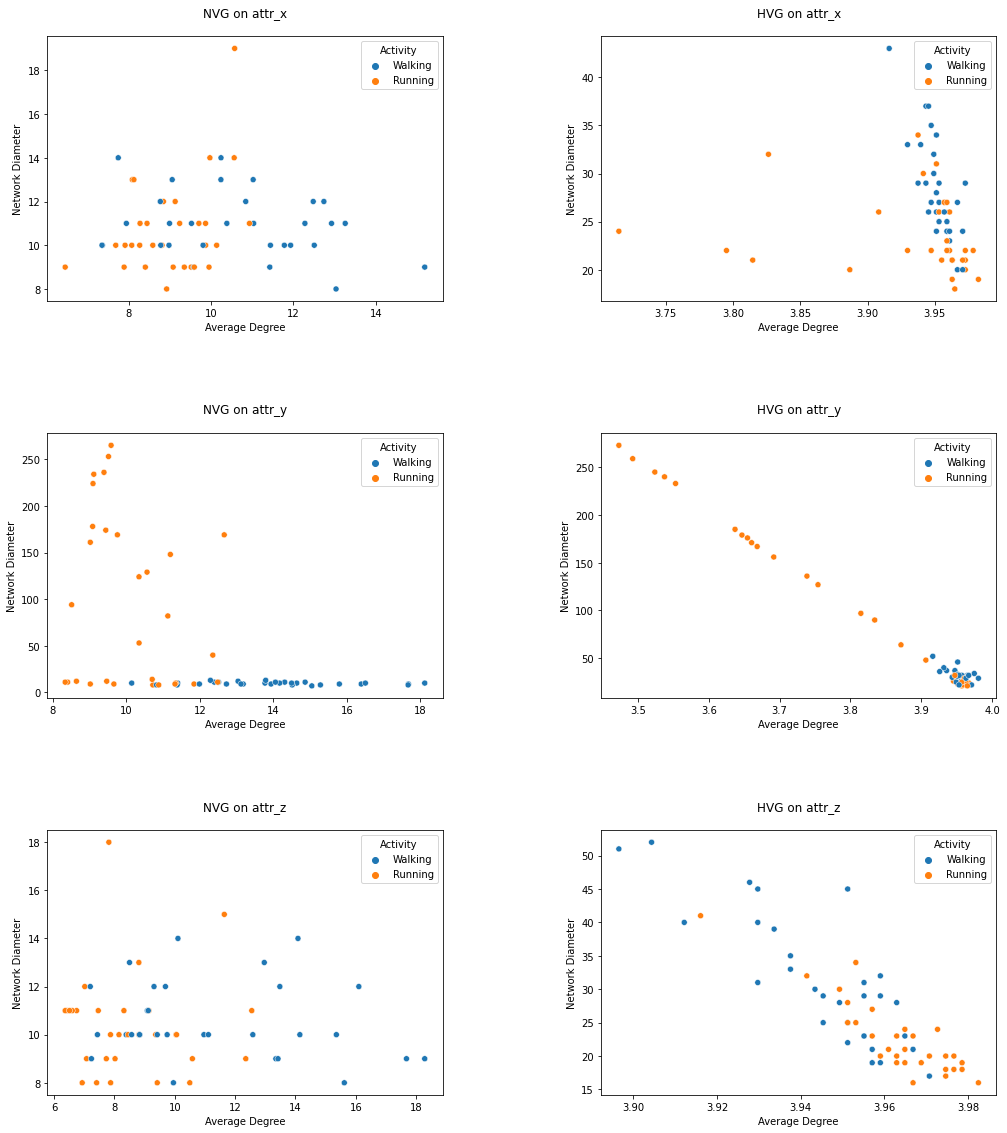

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df_graph[(df_graph['Activity'] == 'Running') | (df_graph['Activity']=='Walking')]

data_1 = data[(data['Accelerometer Axis']=='attr_x') & (data['Method']=='NVG')]
data_2 = data[(data['Accelerometer Axis']=='attr_y') & (data['Method']=='NVG')]
data_3 = data[(data['Accelerometer Axis']=='attr_z') & (data['Method']=='NVG')]

data_4 = data[(data['Accelerometer Axis']=='attr_x') & (data['Method']=='HVG')]
data_5 = data[(data['Accelerometer Axis']=='attr_y') & (data['Method']=='HVG')]
data_6 = data[(data['Accelerometer Axis']=='attr_z') & (data['Method']=='HVG')]

fig, ax = plt.subplots(3,2,figsize=(15,15))

fig.tight_layout(pad=5.0)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

sns.scatterplot(ax=ax[0,0], x=data_1['Average Degree'], y=data_1['Network Diameter'], hue=data_1['Activity'])
ax[0,0].set_title('NVG on attr_x', pad=20)

sns.scatterplot(ax=ax[1,0], x=data_2['Average Degree'], y=data_2['Network Diameter'], hue=data_2['Activity'])
ax[1,0].set_title('NVG on attr_y', pad=20)

sns.scatterplot(ax=ax[2,0], x=data_3['Average Degree'], y=data_3['Network Diameter'], hue=data_3['Activity'])
ax[2,0].set_title('NVG on attr_z', pad=20)

sns.scatterplot(ax=ax[0,1], x=data_4['Average Degree'], y=data_4['Network Diameter'], hue=data_4['Activity'])
ax[0,1].set_title('HVG on attr_x', pad=20)

sns.scatterplot(ax=ax[1,1], x=data_5['Average Degree'], y=data_5['Network Diameter'], hue=data_5['Activity'])
ax[1,1].set_title('HVG on attr_y', pad=20)

sns.scatterplot(ax=ax[2,1], x=data_6['Average Degree'], y=data_6['Network Diameter'], hue=data_6['Activity'])
ax[2,1].set_title('HVG on attr_z', pad=20)

## 1.5 Plotting the Scatterplots Average Degree vs Network Diameter (Climbing Down vs Climbing Up)

Text(0.5, 1.0, 'HVG on attr_z')

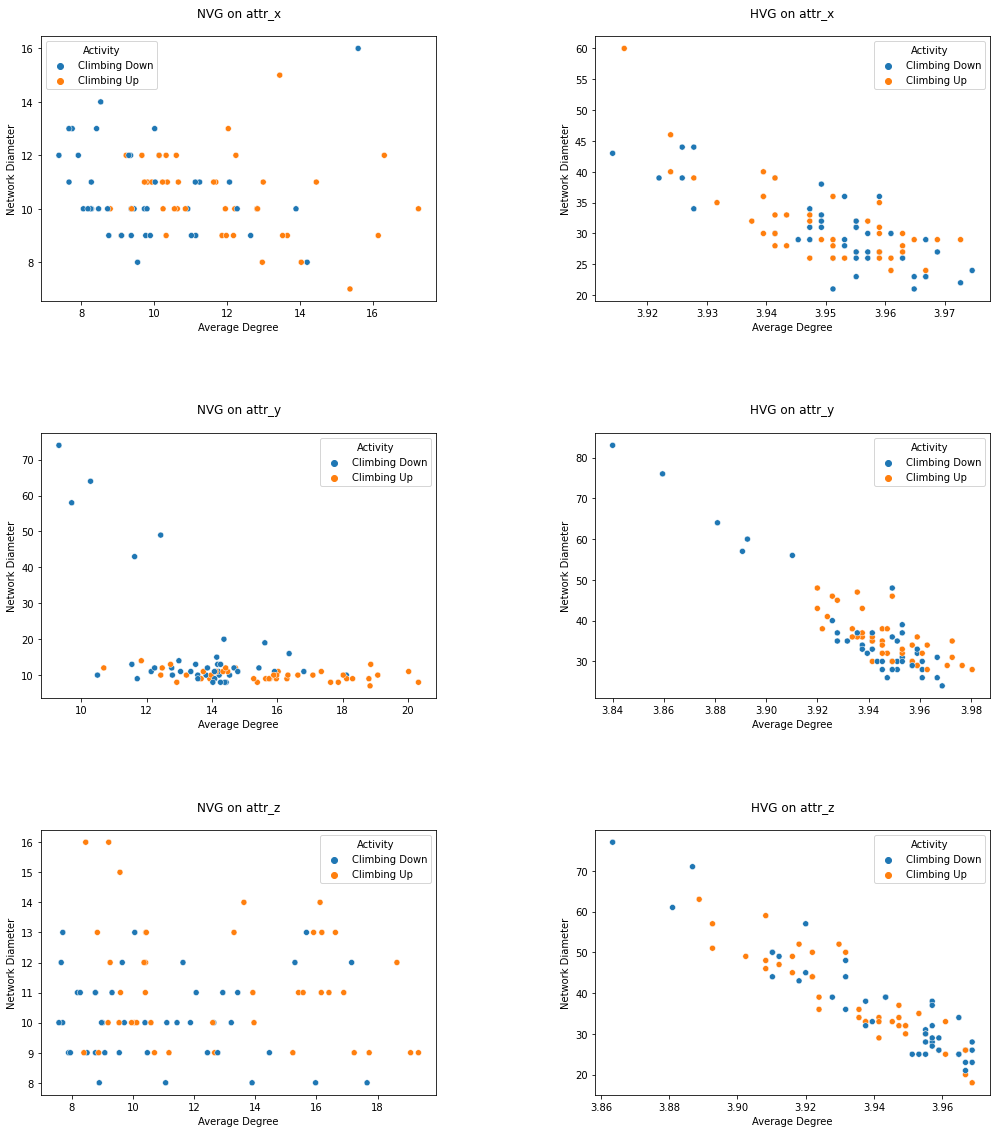

In [ ]:
data = df_graph[(df_graph['Activity'] == 'Climbing Up') | (df_graph['Activity']=='Climbing Down')]

data_1 = data[(data['Accelerometer Axis']=='attr_x') & (data['Method']=='NVG')]
data_2 = data[(data['Accelerometer Axis']=='attr_y') & (data['Method']=='NVG')]
data_3 = data[(data['Accelerometer Axis']=='attr_z') & (data['Method']=='NVG')]

data_4 = data[(data['Accelerometer Axis']=='attr_x') & (data['Method']=='HVG')]
data_5 = data[(data['Accelerometer Axis']=='attr_y') & (data['Method']=='HVG')]
data_6 = data[(data['Accelerometer Axis']=='attr_z') & (data['Method']=='HVG')]

fig, ax = plt.subplots(3,2,figsize=(15,15))

fig.tight_layout(pad=5.0)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

sns.scatterplot(ax=ax[0,0], x=data_1['Average Degree'], y=data_1['Network Diameter'], hue=data_1['Activity'])
ax[0,0].set_title('NVG on attr_x', pad=20)

sns.scatterplot(ax=ax[1,0], x=data_2['Average Degree'], y=data_2['Network Diameter'], hue=data_2['Activity'])
ax[1,0].set_title('NVG on attr_y', pad=20)

sns.scatterplot(ax=ax[2,0], x=data_3['Average Degree'], y=data_3['Network Diameter'], hue=data_3['Activity'])
ax[2,0].set_title('NVG on attr_z', pad=20)

sns.scatterplot(ax=ax[0,1], x=data_4['Average Degree'], y=data_4['Network Diameter'], hue=data_4['Activity'])
ax[0,1].set_title('HVG on attr_x', pad=20)

sns.scatterplot(ax=ax[1,1], x=data_5['Average Degree'], y=data_5['Network Diameter'], hue=data_5['Activity'])
ax[1,1].set_title('HVG on attr_y', pad=20)

sns.scatterplot(ax=ax[2,1], x=data_6['Average Degree'], y=data_6['Network Diameter'], hue=data_6['Activity'])
ax[2,1].set_title('HVG on attr_z', pad=20)

# Task 2

1. Compute permutation entropy and complexity for the aforementioned data.
Consider the accelerometer data in all three directions
2. Vary the following parameters
      Embedded Dimension: 3, 4, 5, 6
      Embedded Delay: 1, 2, 3
      Signal length: 1024, 2048, 4096
3. Generate scatter plots:  permutation entropy vs complexity and color the points
according to walking and running (for signal length =4096, embedded delay = 1,
and embedded dimension = 3, 4, 5, 6, and all three accelerometer directions)
4. Generate  scatter plots: permutation entropy vs complexity and color the points
according to climbing up and climbing down (for signal length =4096, embedded
delay = 1, and embedded dimension = 3, 4, 5, 6, all three accelerometer
directions)

## 2.1 Loading the data

Data has already been loaded for Task 1. Same data is needed for this task as well.

## 2.2 Function to calculate Permutation entropy and Complexity

In [ ]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

## 2.3 Function to tabulate the values of the results for all 15 subjects

In [ ]:
''' Function to create a table for obtaining permutation entropy and complexity for all the subjects'''
def table2(listOfTables):
    Acc = ['attr_x','attr_y','attr_z']
    signal = [1024,2048,4096]
    dim = [3,4,5,6]
    Delay = [1,2,3]
    arr = []
    for i in listOfTables:
        reading = pd.read_csv(i)
        for a in Acc:
          for s in signal:
            for d in dim:
              od_reading_1 = ordinal_patterns(reading[a][1024:1024+s],d,1)           
              od_reading_2 = ordinal_patterns(reading[a][1024:1024+s],d,2)
              od_reading_3 = ordinal_patterns(reading[a][1024:1024+s],d,3)

              row1 = [subject(i), a, s, d, 1, p_entropy(od_reading_1), complexity(od_reading_1), activity(i), body_part(i) ]
              arr.append(row1)

              row2 = [subject(i), a, s, d, 2, p_entropy(od_reading_2), complexity(od_reading_2), activity(i), body_part(i) ]
              arr.append(row2)

              row3 = [subject(i), a, s, d, 3, p_entropy(od_reading_3), complexity(od_reading_3), activity(i), body_part(i) ]
              arr.append(row3)

    return arr

In [ ]:
l2 = table2(ls)

In [ ]:
df_entropy_complexity = pd.DataFrame(l2, columns=['Subject','Accelerometer Axis', 'Signal Length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity', 'Body Part'])

In [ ]:
df_entropy_complexity

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity,Body Part
0,6,attr_x,1024,3,1,0.797847,0.158264,Walking,Chest
1,6,attr_x,1024,3,2,0.931621,0.061386,Walking,Chest
2,6,attr_x,1024,3,3,0.978443,0.020485,Walking,Chest
3,6,attr_x,1024,4,1,0.743617,0.227119,Walking,Chest
4,6,attr_x,1024,4,2,0.891234,0.128526,Walking,Chest
...,...,...,...,...,...,...,...,...,...
15547,12,attr_z,4096,5,2,0.937089,0.102475,Walking,Chest
15548,12,attr_z,4096,5,3,0.942988,0.092683,Walking,Chest
15549,12,attr_z,4096,6,1,0.836297,0.251104,Walking,Chest
15550,12,attr_z,4096,6,2,0.923829,0.147206,Walking,Chest


## 2.4 Plotting the scatterplots for Permuation entropy vs Complexity (Running and Walking)

Text(0.5, 1.0, 'attr_z Dimension = 6')

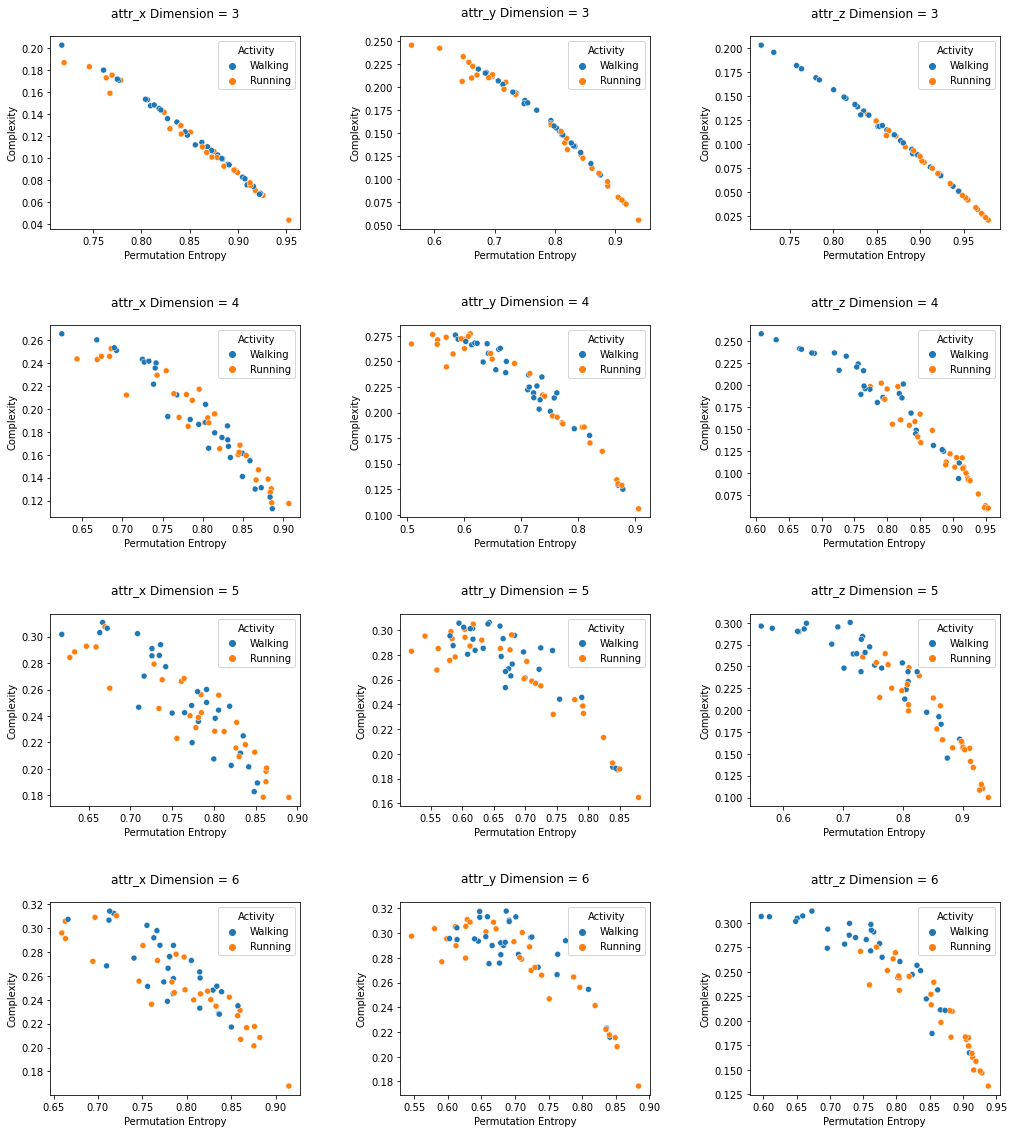

In [ ]:
data = df_entropy_complexity[(df_entropy_complexity['Activity'] == 'Walking') | (df_entropy_complexity['Activity']=='Running')]

data = data[(data['Signal Length']==4096) & (data['Delay']==1)]

data_1 = data[(data['Accelerometer Axis']=='attr_x') & (data['Dimension']== 3)]
data_2 = data[(data['Accelerometer Axis']=='attr_x') & (data['Dimension']== 4)]
data_3 = data[(data['Accelerometer Axis']=='attr_x') & (data['Dimension']== 5)]
data_4 = data[(data['Accelerometer Axis']=='attr_x') & (data['Dimension']== 6)]


data_5 = data[(data['Accelerometer Axis']=='attr_y') & (data['Dimension']== 3)]
data_6 = data[(data['Accelerometer Axis']=='attr_y') & (data['Dimension']== 4)]
data_7 = data[(data['Accelerometer Axis']=='attr_y') & (data['Dimension']== 5)]
data_8 = data[(data['Accelerometer Axis']=='attr_y') & (data['Dimension']== 6)]

data_9 =  data[(data['Accelerometer Axis']=='attr_z') & (data['Dimension']== 3)]
data_10 = data[(data['Accelerometer Axis']=='attr_z') & (data['Dimension']== 4)]
data_11 = data[(data['Accelerometer Axis']=='attr_z') & (data['Dimension']== 5)]
data_12 = data[(data['Accelerometer Axis']=='attr_z') & (data['Dimension']== 6)]

fig, ax = plt.subplots(4,3,figsize=(15,15))

fig.tight_layout(pad=5.0)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

sns.scatterplot(ax=ax[0,0], x=data_1['Permutation Entropy'], y=data_1['Complexity'], hue=data_1['Activity'])
ax[0,0].set_title('attr_x Dimension = 3' , pad=20)

sns.scatterplot(ax=ax[1,0], x=data_2['Permutation Entropy'], y=data_2['Complexity'], hue=data_2['Activity'])
ax[1,0].set_title('attr_x Dimension = 4', pad=20)

sns.scatterplot(ax=ax[2,0], x=data_3['Permutation Entropy'], y=data_3['Complexity'], hue=data_3['Activity'])
ax[2,0].set_title('attr_x Dimension = 5', pad=20)

sns.scatterplot(ax=ax[3,0], x=data_4['Permutation Entropy'], y=data_4['Complexity'], hue=data_4['Activity'])
ax[3,0].set_title('attr_x Dimension = 6', pad=20)

sns.scatterplot(ax=ax[0,1], x=data_5['Permutation Entropy'], y=data_5['Complexity'], hue=data_5['Activity'])
ax[0,1].set_title('attr_y Dimension = 3', pad=20)

sns.scatterplot(ax=ax[1,1], x=data_6['Permutation Entropy'], y=data_6['Complexity'], hue=data_6['Activity'])
ax[1,1].set_title('attr_y Dimension = 4', pad=20)

sns.scatterplot(ax=ax[2,1], x=data_7['Permutation Entropy'], y=data_7['Complexity'], hue=data_7['Activity'])
ax[2,1].set_title('attr_y Dimension = 5', pad=20)

sns.scatterplot(ax=ax[3,1], x=data_8['Permutation Entropy'], y=data_8['Complexity'], hue=data_8['Activity'])
ax[3,1].set_title('attr_y Dimension = 6', pad=20)

sns.scatterplot(ax=ax[0,2], x=data_9['Permutation Entropy'], y=data_9['Complexity'], hue=data_9['Activity'])
ax[0,2].set_title('attr_z Dimension = 3', pad=20)

sns.scatterplot(ax=ax[1,2], x=data_10['Permutation Entropy'], y=data_10['Complexity'], hue=data_10['Activity'])
ax[1,2].set_title('attr_z Dimension = 4', pad=20)

sns.scatterplot(ax=ax[2,2], x=data_11['Permutation Entropy'], y=data_11['Complexity'], hue=data_11['Activity'])
ax[2,2].set_title('attr_z Dimension = 5', pad=20)

sns.scatterplot(ax=ax[3,2], x=data_12['Permutation Entropy'], y=data_12['Complexity'], hue=data_12['Activity'])
ax[3,2].set_title('attr_z Dimension = 6', pad=20)

## 2.5 Plotting the scatterplots for Permuation entropy vs Complexity (Climbing Up and Climbing Down)

Text(0.5, 1.0, 'attr_z Dimension = 6')

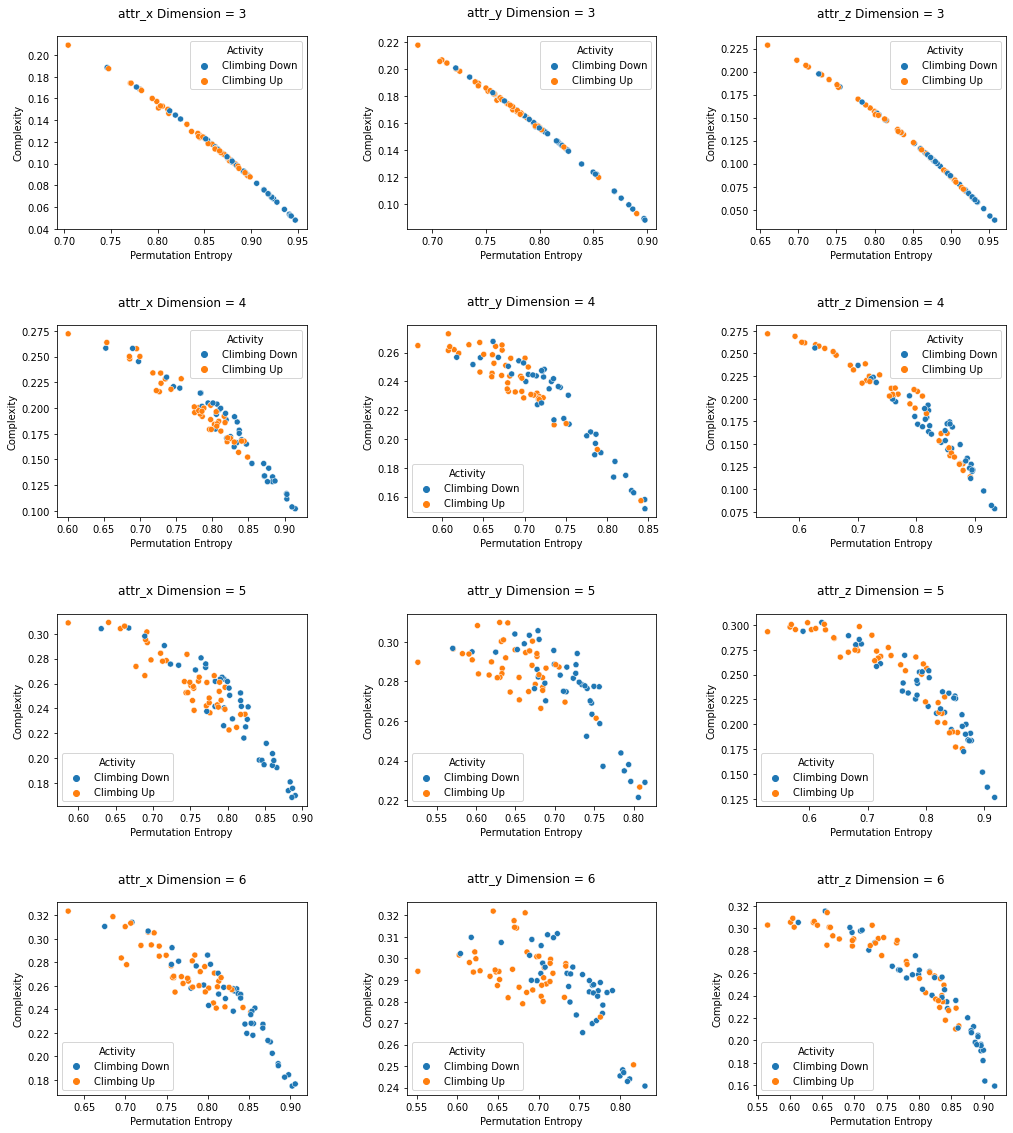

In [ ]:
data = df_entropy_complexity[(df_entropy_complexity['Activity'] == 'Climbing Up') | (df_entropy_complexity['Activity']=='Climbing Down')]

data = data[(data['Signal Length']==4096) & (data['Delay']==1)]

data_1 = data[(data['Accelerometer Axis']=='attr_x') & (data['Dimension']== 3)]
data_2 = data[(data['Accelerometer Axis']=='attr_x') & (data['Dimension']== 4)]
data_3 = data[(data['Accelerometer Axis']=='attr_x') & (data['Dimension']== 5)]
data_4 = data[(data['Accelerometer Axis']=='attr_x') & (data['Dimension']== 6)]


data_5 = data[(data['Accelerometer Axis']=='attr_y') & (data['Dimension']== 3)]
data_6 = data[(data['Accelerometer Axis']=='attr_y') & (data['Dimension']== 4)]
data_7 = data[(data['Accelerometer Axis']=='attr_y') & (data['Dimension']== 5)]
data_8 = data[(data['Accelerometer Axis']=='attr_y') & (data['Dimension']== 6)]

data_9 =  data[(data['Accelerometer Axis']=='attr_z') & (data['Dimension']== 3)]
data_10 = data[(data['Accelerometer Axis']=='attr_z') & (data['Dimension']== 4)]
data_11 = data[(data['Accelerometer Axis']=='attr_z') & (data['Dimension']== 5)]
data_12 = data[(data['Accelerometer Axis']=='attr_z') & (data['Dimension']== 6)]

fig, ax = plt.subplots(4,3,figsize=(15,15))

fig.tight_layout(pad=5.0)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

sns.scatterplot(ax=ax[0,0], x=data_1['Permutation Entropy'], y=data_1['Complexity'], hue=data_1['Activity'])
ax[0,0].set_title('attr_x Dimension = 3' , pad=20)

sns.scatterplot(ax=ax[1,0], x=data_2['Permutation Entropy'], y=data_2['Complexity'], hue=data_2['Activity'])
ax[1,0].set_title('attr_x Dimension = 4', pad=20)

sns.scatterplot(ax=ax[2,0], x=data_3['Permutation Entropy'], y=data_3['Complexity'], hue=data_3['Activity'])
ax[2,0].set_title('attr_x Dimension = 5', pad=20)

sns.scatterplot(ax=ax[3,0], x=data_4['Permutation Entropy'], y=data_4['Complexity'], hue=data_4['Activity'])
ax[3,0].set_title('attr_x Dimension = 6', pad=20)

sns.scatterplot(ax=ax[0,1], x=data_5['Permutation Entropy'], y=data_5['Complexity'], hue=data_5['Activity'])
ax[0,1].set_title('attr_y Dimension = 3', pad=20)

sns.scatterplot(ax=ax[1,1], x=data_6['Permutation Entropy'], y=data_6['Complexity'], hue=data_6['Activity'])
ax[1,1].set_title('attr_y Dimension = 4', pad=20)

sns.scatterplot(ax=ax[2,1], x=data_7['Permutation Entropy'], y=data_7['Complexity'], hue=data_7['Activity'])
ax[2,1].set_title('attr_y Dimension = 5', pad=20)

sns.scatterplot(ax=ax[3,1], x=data_8['Permutation Entropy'], y=data_8['Complexity'], hue=data_8['Activity'])
ax[3,1].set_title('attr_y Dimension = 6', pad=20)

sns.scatterplot(ax=ax[0,2], x=data_9['Permutation Entropy'], y=data_9['Complexity'], hue=data_9['Activity'])
ax[0,2].set_title('attr_z Dimension = 3', pad=20)

sns.scatterplot(ax=ax[1,2], x=data_10['Permutation Entropy'], y=data_10['Complexity'], hue=data_10['Activity'])
ax[1,2].set_title('attr_z Dimension = 4', pad=20)

sns.scatterplot(ax=ax[2,2], x=data_11['Permutation Entropy'], y=data_11['Complexity'], hue=data_11['Activity'])
ax[2,2].set_title('attr_z Dimension = 5', pad=20)

sns.scatterplot(ax=ax[3,2], x=data_12['Permutation Entropy'], y=data_12['Complexity'], hue=data_12['Activity'])
ax[3,2].set_title('attr_z Dimension = 6', pad=20)

In [ ]:
data

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity,Body Part
132,3,attr_x,4096,3,1,0.857879,0.118225,Climbing Down,Chest
135,3,attr_x,4096,4,1,0.794092,0.204895,Climbing Down,Chest
138,3,attr_x,4096,5,1,0.770513,0.272984,Climbing Down,Chest
141,3,attr_x,4096,6,1,0.803298,0.278292,Climbing Down,Chest
168,3,attr_y,4096,3,1,0.758133,0.181382,Climbing Down,Chest
...,...,...,...,...,...,...,...,...,...
15405,9,attr_y,4096,6,1,0.703109,0.305957,Climbing Down,Chest
15432,9,attr_z,4096,3,1,0.899726,0.086933,Climbing Down,Chest
15435,9,attr_z,4096,4,1,0.849175,0.164778,Climbing Down,Chest
15438,9,attr_z,4096,5,1,0.828649,0.232656,Climbing Down,Chest


In [ ]:
!jupyter nbconvert --to html FDA_Project_2.ipynb

[NbConvertApp] Converting notebook FDA_Project_2.ipynb to html
[NbConvertApp] Writing 1138511 bytes to FDA_Project_2.html


<hr>